In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

### Выборка из распределения Коши  

In [47]:
sample = sps.cauchy.rvs(size=100, loc=0, scale=1)

В модели $N(\theta,1)$ оценка максимального правдоподобия - $\overline{X}$

Сопряженное априорное распределение для $ N(\theta,1)$ - это $N(\mu_{0},\sigma_{0})$

Гиперпараметры апостериорного распределения: $\mu =\left.\left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right)\right/\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)$

Апостериорное распределение ~ $N(\mu,\sigma_{2}^2)$ => $E(\theta|X) = \mu = \hat{\theta}$

Так как $\sigma = 1 => \hat{\theta} = \left.\left(\frac{\mu_0}{\sigma_0^2} + \sum_{i=1}^n x_i\right)\right/\left(\frac{1}{\sigma_0^2} + n\right)$

Про мы знаем,что $\theta$ близко к нулю(с вероятностью не менее 0.95 выполнено неравенство |𝜃| < 0.5), значит $P_{N(\mu_{0}, \sigma_{0}^{2})}(\theta < 0.5) \geq 0.95$ (так априорное распределение-это распределение параметра $\theta$)







По правилу двух сигм, вероятность случайной величины $N(a,\sigma^2)$ попасть в отрезок $[a-2\sigma, 1+2\sigma]$ равна 0.95. Так как в нашем случае а = 0 (так как $\theta$ близко к 0 по условию), то получается,что 2$\sigma$ = 0.5 => $\sigma^2$ = 0.0625

#### Проверка этого правила:

In [48]:
sps.norm.cdf(0.5,scale =0.25, loc=0) - sps.norm.cdf(-0.5,scale =0.25, loc=0)

0.95449973610364158

## Оценки

In [49]:
mu0 = 0
sigma0 = 0.0625

In [50]:
means = sample.cumsum() / np.arange(1, 100 + 1)
bayes = (float(mu0)/ sigma0 + sample.cumsum())/ (1./sigma0 + np.arange(1,101))

## Графики абсолютной величины отклонения оценок от истинного значения параметра 

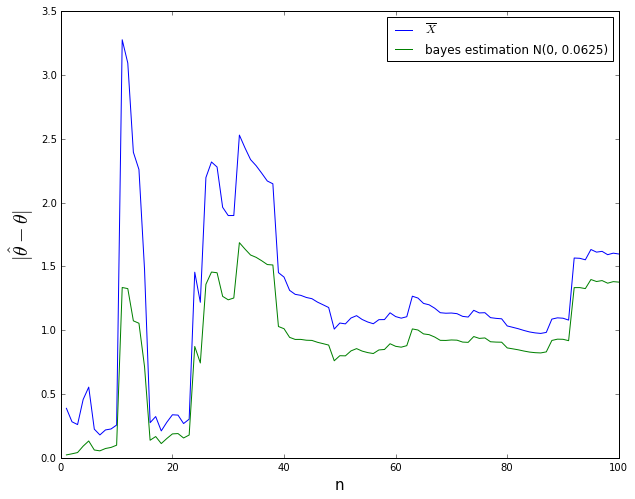

In [62]:
plt.figure(figsize=(10,8))
grid = np.arange(1, 101)
plt.plot(grid, map(abs,means), label = '$\overline{X}$')
plt.plot(grid, map(abs,bayes), label='bayes estimation N(' + str(mu0) + ', ' 
         + str(sigma0) + ')')
plt.ylim(0,3.5)
plt.ylabel(r'$|\hat{\theta} - \theta|$',fontsize = 20)
plt.xlabel("n", fontsize = 15)
plt.legend()


Вывод: из графика видно, что байесовская оценка лучше оценки по методу максимального правдоподобия (так как при подсчете байесовской оценки у нас имеется априорное знание о $\theta$)